In [3]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

def loss_fn(X, Y, beta):
    return cp.norm(X @ beta - Y, p=2)**2 / X.shape[0]

def regularizer(beta):
    return cp.norm(beta, p=1)

def objective_fn(X, Y, beta, lambd):
    return loss_fn(X, Y, beta) + lambd * regularizer(beta)

def mse(X, Y, beta):
    return np.linalg.norm(X.dot(beta) - Y)**2 / len(Y)

def generate_data(m=100, n=20, sigma=5, density=0.2):
    np.random.seed(1)
    beta_star = np.random.randn(n)
    idxs = np.random.choice(range(n), int((1-density)*n), replace=False)
    for idx in idxs:
        beta_star[idx] = 0
    X = np.random.randn(m,n)
    Y = X.dot(beta_star) + np.random.normal(0, sigma, size=m)
    return X, Y, beta_star

m = 100
n = 20
sigma = 5
density = 0.2

X, Y, _ = generate_data(m, n, sigma)
X_train = X[:50, :]
Y_train = Y[:50]
X_test = X[50:, :]
Y_test = Y[50:]

beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
lambd_values = np.logspace(-2, 3, 50)
train_errors = []
test_errors = []
beta_values = []

for v in lambd_values:
    lambd.value = v
    problem = cp.Problem(cp.Minimize(objective_fn(X_train, Y_train, beta, lambd)))
    problem.solve()
    train_errors.append(mse(X_train, Y_train, beta.value))
    test_errors.append(mse(X_test, Y_test, beta.value))
    beta_values.append(beta.value)

(CVXPY) Feb 09 04:20:18 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Version of ortools (9.4.1874) is too old. Expected >= 9.5.0.')
(CVXPY) Feb 09 04:20:18 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Version of ortools (9.4.1874) is too old. Expected >= 9.5.0.')


/opt/conda/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/opt/conda/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


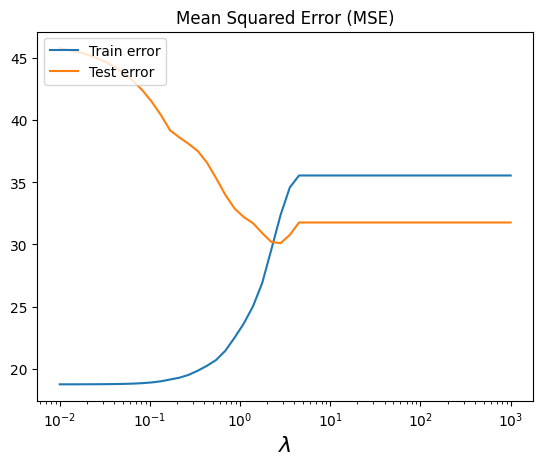

In [4]:
def plot_train_test_errors(train_errors, test_errors, lambd_values):
    plt.plot(lambd_values, train_errors, label="Train error")
    plt.plot(lambd_values, test_errors, label="Test error")
    plt.xscale("log")
    plt.legend(loc="upper left")
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.title("Mean Squared Error (MSE)")
    plt.show()

plot_train_test_errors(train_errors, test_errors, lambd_values)

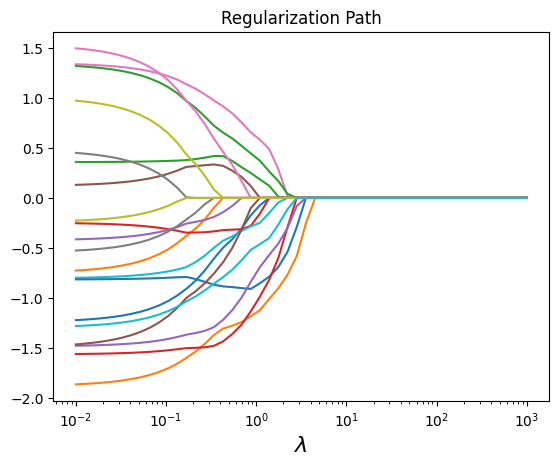

In [5]:
def plot_regularization_path(lambd_values, beta_values):
    num_coeffs = beta_values[0].shape[0]
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in beta_values])
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()

plot_regularization_path(lambd_values, beta_values)